In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import make_pipeline

%matplotlib inline

In [2]:
#load and inspect the data
data = pd.read_csv("diabetes.csv")
data[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
data.shape

(768, 9)

In [4]:
data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
#Extracting Independent and dependent Variable
  
x = data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]].values 
#x = data.iloc[:, :8].values    # both are same

y = data.iloc[:, 8].values  

In [12]:
x[:3]

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ],
       [  8.   , 183.   ,  64.   ,   0.   ,   0.   ,  23.3  ,   0.672,
         32.   ]])

#### Normal blood glucose levels for adults, without diabetes, is 90 to 110 mg/dL.

#### Normal blood sugar levels for adults	
* Fasting	Less than 100
* Before meal	70-130
* 1-2 hours after eating	Less than 180
* Bedtime	100-140

In [7]:
no_sugar = data.loc[y == 1]
with_sugar = data.loc[y == 0]

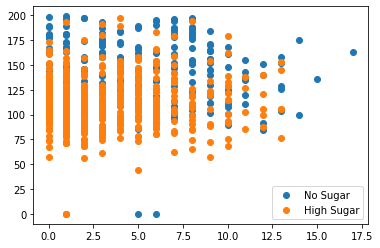

In [8]:
# plots
plt.scatter(no_sugar.iloc[:, 0], no_sugar.iloc[:, 1], label='No Sugar')
plt.scatter(with_sugar.iloc[:, 0], with_sugar.iloc[:, 1], label='High Sugar')
plt.legend()
plt.show()

In [9]:
def sigmoid(z):
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-z))
sigmoid(x)

array([[0.99752738, 1.        , 1.        , ..., 1.        , 0.65180891,
        1.        ],
       [0.73105858, 1.        , 1.        , ..., 1.        , 0.58686006,
        1.        ],
       [0.99966465, 1.        , 1.        , ..., 1.        , 0.66195085,
        1.        ],
       ...,
       [0.99330715, 1.        , 1.        , ..., 1.        , 0.56094545,
        1.        ],
       [0.73105858, 1.        , 1.        , ..., 1.        , 0.58637506,
        1.        ],
       [0.73105858, 1.        , 1.        , ..., 1.        , 0.57810523,
        1.        ]])